In [118]:
from sklearn.cluster import KMeans as KM
from sklearn.feature_selection import SelectKBest as best
from sklearn.feature_selection import f_classif
from scipy.stats import kurtosis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import numpy as np
#plot the depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score




In [7]:
df = pd.read_csv('data/breast_cancer.csv', delimiter=',', quotechar='"')
features = df.loc[:,"radius_mean":"fractal_dimension_worst"]
labels = df["diagnosis"]
#1 for malignant 0 for benign
binary_labels = [1 if x == 'M' else 0 for x in labels]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

all_data = np.column_stack( (features, binary_labels))
X_train_BC, X_test_BC, y_train_BC, y_test_BC = train_test_split(features, binary_labels, test_size=0.25)


In [108]:
def kbest(tx, ty, rx, ry):
    scores = []
    compressor = best(f_classif)
    compressor.fit(tx, y=ty)
    newtx = compressor.transform(tx)
    newrx = compressor.transform(rx)
    scores.append(oneem(newtx, ty, newrx, ry, times=10))
    scores.append(onekm(newtx, ty, newrx, ry, times=10))
    return scores


In [19]:
X_train_BC

array([[-1.23554461, -0.53514364, -1.21383539, ..., -0.93287611,
        -0.59494806,  0.04068534],
       [ 1.32995562,  0.16064943,  1.19167231, ...,  0.22525888,
        -0.53994352, -1.47272064],
       [-0.8512734 , -0.62124513, -0.88554949, ..., -1.12929922,
        -0.83761515, -0.72682373],
       ...,
       [ 0.13425586,  0.93090865,  0.08242022, ...,  0.32423177,
        -0.68554377, -0.8637008 ],
       [-0.27188444, -0.24891439, -0.31671283, ..., -0.15388339,
        -1.07704668, -0.81438072],
       [-0.65814375, -0.44206096, -0.68783653, ..., -1.08940554,
         0.48411161, -1.00778193]])

In [111]:
scores = kbest(X_train_FM, y_train_FM, X_test_FM, y_test_FM);

In [37]:
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier

#change the number of hidden epochs
num_epochs = range(1,701, 50)

train_acc = []
test_acc = []

compressor = best(f_classif)
compressor.fit(X_train_FM, y=y_train_FM)
newtx = compressor.transform(X_train_FM)
newrx = compressor.transform(X_test_FM)


for i in num_epochs:
    print(i)
    hidden_layer = tuple([15]*14)
    mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=i, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1)
    mlp.fit(newtx,y_train_FM)
    prediction_test = mlp.predict(newrx)
    prediction_train = mlp.predict(newtx)
    train_acc.append((accuracy_score(y_train_FM, prediction_train)))
    test_acc.append((accuracy_score(y_test_FM, prediction_test)))

import matplotlib.pyplot as plt
plt.figure()
plt.title('FM K-best Neural Network: Accuracy vs Number of Epochs')
#plt.ylim((0,1))
plt.plot(num_epochs, list(train_acc), '-', label='train accuracy')
plt.plot(num_epochs, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Score")

#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.savefig('precision_accuracy_neural_net_num_epochs_fashion')
plt.legend()
plt.show()



1


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


51


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


101


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


151
201
251
301
351
401
451


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

In [38]:
num_layers = range(0,10)

train_acc = []
test_acc = []

compressor = best(f_classif)
compressor.fit(X_train_FM, y=y_train_FM)
newtx = compressor.transform(X_train_FM)
newrx = compressor.transform(X_test_FM)


for i in num_layers:
    print(i)
    hidden_layer = tuple([15]*i)
    est = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=100, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1, warm_start=True)
    est.fit(newtx, y_train_FM)
    train_acc.append((accuracy_score(y_train_FM, est.predict(newtx))))
    test_acc.append((accuracy_score(y_test_FM, est.predict(newrx))))



0


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


2


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


3


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


4


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


5


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


6


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


7


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


8


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


9


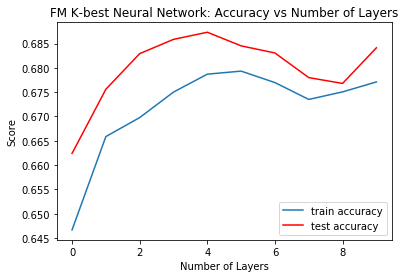

In [39]:
plt.figure()
plt.title('FM K-best Neural Network: Accuracy vs Number of Layers')
#plt.ylim((0,1))
plt.plot(num_layers, list(train_acc), '-', label='train accuracy')
plt.plot(num_layers, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Layers")
plt.ylabel("Score")

#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.legend()
plt.savefig('precision_accuracy_neural_net_num_layers_fashion')

plt.show()

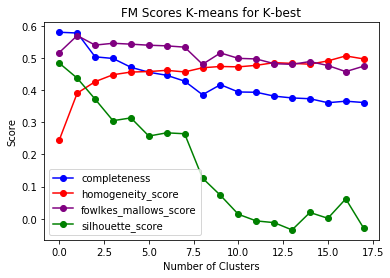

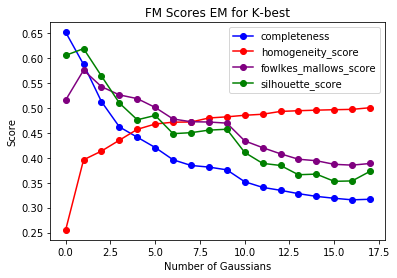

In [25]:
plt.figure()
plt.title('FM Scores K-means for K-best')
#plt.ylim((0,1))


depths= range(0, len(scores[0][0]))
#scores= [completeness, homo, fm, silo] 
plt.plot(depths, scores[0][0], 'o-', color='blue', label='completeness')
plt.plot(depths, scores[0][1],'o-',  color='red', label='homogeneity_score')
plt.plot(depths, scores[0][2],'o-',  color='purple', label='fowlkes_mallows_score')
plt.plot(depths, scores[0][3],'o-',  color='green', label='silhouette_score')



plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.savefig('depth_scores_FM_km')
plt.show()


plt.figure()
plt.title('FM Scores EM for K-best')
#plt.ylim((0,1))


depths= range(0, len(scores[1][0]))
#scores= [completeness, homo, fm, silo] 
plt.plot(depths, scores[1][0], 'o-', color='blue', label='completeness')
plt.plot(depths, scores[1][1],'o-',  color='red', label='homogeneity_score')
plt.plot(depths, scores[1][2],'o-',  color='purple', label='fowlkes_mallows_score')
plt.plot(depths, scores[1][3],'o-',  color='green', label='silhouette_score')



plt.xlabel("Number of Gaussians")
plt.ylabel("Score")
plt.legend()
plt.savefig('depth_scores_FM_em')
plt.show()

In [17]:
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score, fowlkes_mallows_score
def km(tx, ty, rx, ry, add="", times=5):
    #this does the exact same thing as the above
    errs = []
    completeness = []
    homo = []
    fm = []
    silo = []
    
    

#     checker = KM(n_clusters=2)
#     checker.fit(ry)
#     truth = checker.predict(ry)

    # so we do this a bunch of times
    for i in range(2,times):
        clusters = {x:[] for x in range(i)}
        clf = KM(n_clusters=i)
        clf.fit(tx)  #fit it to our data
        test = clf.predict(tx)
        result = clf.predict(rx)  # and test it on the testing set
        completeness.append(completeness_score(ry, result))
        homo.append(homogeneity_score(ry, result))
        fm.append(fowlkes_mallows_score(ry, result))
        silo.append(silhouette_score(rx, result))
        errs.append(clf.inertia_)
    print(errs)
    print(completeness)
    print(homo)
    print(fm)
    print(silo)
    scores= [completeness, homo, fm, silo]        
    #plot([0, times, min(errs)-5, max(errs)+5],[range(2, times), errs, "ro"], "Number of Clusters", "Intertia", "KMeans clustering Intertia " + add, "KM"+add)
    return scores

In [133]:
def ica_kurtosis(tx, ty, rx, ry, comp):
    scores = []
    x,y = tx.shape
    print(x, y)
    kurtosis_before_train = []
    kurtosis_before_test = []
    
    kurtosis_after_train = []
    kurtosis_after_test = []
    
    for i in range(y):
        kurtosis_before_train.append(kurtosis(tx[:,i], fisher=False))
        kurtosis_before_test.append(kurtosis(rx[:,i],fisher=False))
    
    compressor = ICA( whiten=False)  # for some people, whiten needs to be off
    compressor.fit(tx, y=ty)
    newtx = compressor.transform(tx)
    newrx = compressor.transform(rx)
    for i in range(y):
        kurtosis_after_train.append(kurtosis(newtx[:,i], fisher=False))
        kurtosis_after_test.append(kurtosis(newrx[:,i], fisher=False))
    return [sum(kurtosis_before_train), sum(kurtosis_before_test), sum(kurtosis_after_train), sum(kurtosis_after_test)]


In [136]:
scores_BC = ica_kurtosis(X_train_BC, y_train_BC, X_test_BC, y_test_BC, 4)

426 30


/usr/local/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [137]:
scores_FM = ica_kurtosis(X_train_FM, y_train_FM, X_test_FM, y_test_FM, 4)

22500 784


/usr/local/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [138]:
scores_FM

[106622.62489403925, 52397.1424513685, 19025.695004794896, 5511.216925751539]

In [155]:
label_BC = ['Train Before ICA BC', 'Train After ICA BC'] 

In [156]:
scores = [scores_BC[0], scores_BC[2]]

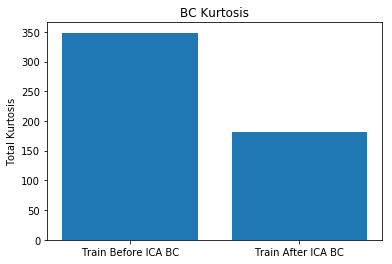

In [162]:
plt.bar(np.arange(2), scores)
plt.ylabel("Total Kurtosis")
plt.title("BC Kurtosis")
plt.xticks(np.arange(2), label_BC)
plt.savefig("BC kurtosis")

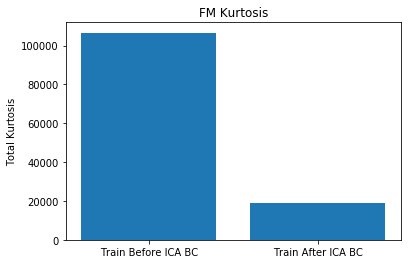

In [163]:
scores_FM = [106622.62489403925, 19025.695004794896]
plt.bar(np.arange(2), scores_FM)
plt.ylabel("Total Kurtosis")
plt.title("FM Kurtosis")
plt.xticks(np.arange(2), label_BC)
plt.savefig("FM kurtosis")

In [67]:
def onekm(tx, ty, rx, ry,times=8):
    clf = KM(n_clusters=times)
    clf.fit(tx)  #fit it to our data
    scores = []
    scores.append(clf.labels_.reshape(-1, 1))
    scores.append(clf.predict(rx).reshape(-1, 1))
    return scores
    


In [13]:
def plot(axes, values, x_label, y_label, title, name):
    plt.clf()
    plt.plot(*values)
    plt.axis(axes)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.savefig(name+".png", dpi=500)
    plt.show()
    plt.legend()
    plt.clf()

In [14]:
def moplot(axes,completeness, homo, fm, silo , x_label, y_label, 
         title, name):
    plt.clf()
    plt.plot(*completeness)
    plt.plot(*homo)
    plt.plot(*fm)
    plt.plot(*silo)
    plt.axis(axes)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.savefig(name+".png", dpi=500)
    plt.show()
    plt.clf()

[8199.93963202197, 7117.551776993354, 6526.5881563429975, 5961.259115146696, 5617.097502125818, 5330.15139573337, 5118.661276300772, 4823.646116104108, 4671.5457478657845, 4483.451825070393, 4328.970269631544, 4191.084377803969, 4094.6488262584608, 3971.6309501158353, 3879.4934611103154, 3784.516824378404, 3700.598968838361, 3667.329172635034, 3532.6278504886977]
[0.48113866098433333, 0.35461765003846424, 0.3483499799044774, 0.256067038070123, 0.23152643098057968, 0.23056753820293588, 0.20575056097874775, 0.23577845612699544, 0.21270149527635904, 0.2222826634384431, 0.2018332357276395, 0.2236520829102972, 0.19960628196504884, 0.19255635621647127, 0.21268211475700655, 0.1955007035122227, 0.21265021527318148, 0.18307521927772796, 0.21371928191737746]
[0.46637787576705547, 0.5166514972034085, 0.5778380316956406, 0.5591525044759648, 0.5904133758051592, 0.6158758014033514, 0.5866351948161103, 0.6995721009143435, 0.6291091216197814, 0.6730837145984673, 0.6753817734328944, 0.7617924858508553,

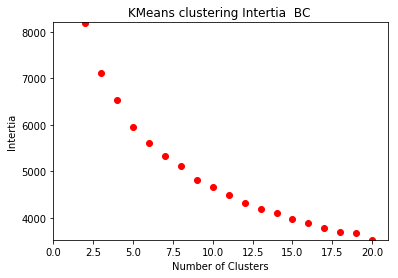

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

In [15]:
scores = km(X_train_BC, y_train_BC, X_test_BC, y_test_BC, add = " BC ", times = 21);

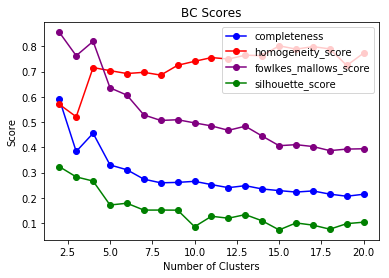

In [73]:
plt.figure()
plt.title('BC Scores')
#plt.ylim((0,1))


depths= range(2, 21)
#scores= [completeness, homo, fm, silo] 
plt.plot(depths, scores[0], 'o-', color='blue', label='completeness')
plt.plot(depths, scores[1],'o-',  color='red', label='homogeneity_score')
plt.plot(depths, scores[2],'o-',  color='purple', label='fowlkes_mallows_score')
plt.plot(depths, scores[3],'o-',  color='green', label='silhouette_score')



plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.savefig('depth_scores_breastCancer')
plt.show()

In [23]:
#fashion
df = pd.read_csv('data/fashion_half.csv', delimiter=',', quotechar='"')
from sklearn.model_selection import train_test_split
features = df.loc[:,"pixel1":"pixel784"]
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

X_train_FM, X_test_FM, y_train_FM, y_test_FM = train_test_split(features, df["label"], test_size=0.25)
#scores=km(X_train_FM, y_train_FM, X_test_FM, y_test_FM, add = " FM ", times = 21);

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


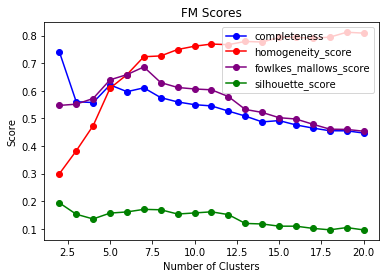

In [77]:
plt.figure()
plt.title('FM Scores')
#plt.ylim((0,1))


depths= range(2, 21)
#scores= [completeness, homo, fm, silo] 
plt.plot(depths, scores[0], 'o-', color='blue', label='completeness')
plt.plot(depths, scores[1],'o-',  color='red', label='homogeneity_score')
plt.plot(depths, scores[2],'o-',  color='purple', label='fowlkes_mallows_score')
plt.plot(depths, scores[3],'o-',  color='green', label='silhouette_score')



plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.savefig('depth_scores_FM')
plt.show()

In [86]:
from sklearn.mixture import GaussianMixture as EM
def em(tx, ty, rx, ry, add="", times=5):
    completeness = []
    homo = []
    fm = []
    silo = []
    
    # so we do this a bunch of times
    for i in range(2,times):

        # create a clusterer
        clf = EM(n_components=i,)
        clf.fit(tx)  #fit it to our data
        test = clf.predict(tx)
        print(clf.predict_proba(rx))
        
        result = clf.predict(rx)  # and test it on the testing set

        completeness.append(completeness_score(ry, result))
        homo.append(homogeneity_score(ry, result))
        fm.append(fowlkes_mallows_score(ry, result))
        silo.append(silhouette_score(rx, result))
    scores= [completeness, homo, fm, silo] 
    
    return scores
        
    

In [91]:
def oneem(tx, ty, rx, ry, add="", times=5):
    scores = []
    clf = EM(n_components=times)
    clf.fit(tx)  #fit it to our data
    scores.append(clf.predict_proba(tx))
    scores.append(clf.predict_proba(rx))
    return scores


In [87]:
scores = oneem(X_train_FM, y_train_FM, X_test_FM, y_test_FM, times = 8);

[[9.99999999e-001 6.81628357e-010]
 [1.00000000e+000 1.68271127e-011]
 [1.00000000e+000 2.14374160e-011]
 [1.00000000e+000 3.27623978e-016]
 [6.73352445e-036 1.00000000e+000]
 [1.00000000e+000 1.01426166e-010]
 [2.40058033e-261 1.00000000e+000]
 [1.00000000e+000 8.38596505e-018]
 [1.00000000e+000 5.73843146e-019]
 [3.97792343e-071 1.00000000e+000]
 [1.00000000e+000 7.97739263e-018]
 [1.00000000e+000 4.16122317e-019]
 [9.99999981e-001 1.93246554e-008]
 [9.42857564e-027 1.00000000e+000]
 [1.00000000e+000 2.94296231e-013]
 [4.85652323e-259 1.00000000e+000]
 [9.86358664e-001 1.36413359e-002]
 [1.00000000e+000 4.75545489e-034]
 [1.42338254e-155 1.00000000e+000]
 [9.99999927e-001 7.32234371e-008]
 [1.00000000e+000 2.80831971e-010]
 [4.16980835e-117 1.00000000e+000]
 [2.84592637e-266 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [6.49165137e-145 1.00000000e+000]
 [9.99999990e-001 1.04477526e-008]
 [8.33090102e-018 1.00000000e+000]
 [1.00000000e+000 3.29146813e-011]
 [1.00000000e+000 1.

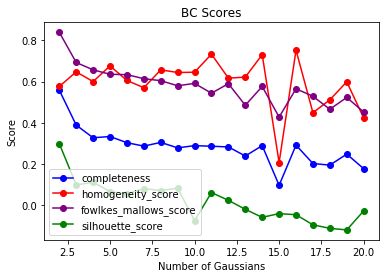

In [86]:
plt.figure()
plt.title('BC Scores')
#plt.ylim((0,1))


depths= range(2, 21)
#scores= [completeness, homo, fm, silo] 
plt.plot(depths, scores[0], 'o-', color='blue', label='completeness')
plt.plot(depths, scores[1],'o-',  color='red', label='homogeneity_score')
plt.plot(depths, scores[2],'o-',  color='purple', label='fowlkes_mallows_score')
plt.plot(depths, scores[3],'o-',  color='green', label='silhouette_score')



plt.xlabel("Number of Gaussians")
plt.ylabel("Score")
plt.legend()
plt.savefig('depth_scores_breastCancer_em')
plt.show()

In [87]:
scores=em(X_train_FM, y_train_FM, X_test_FM, y_test_FM, add = " FM ", times = 21);

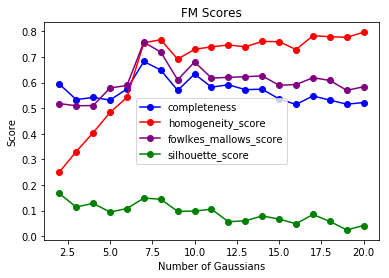

In [88]:
plt.figure()
plt.title('FM Scores')
#plt.ylim((0,1))


depths= range(2, 21)
#scores= [completeness, homo, fm, silo] 
plt.plot(depths, scores[0], 'o-', color='blue', label='completeness')
plt.plot(depths, scores[1],'o-',  color='red', label='homogeneity_score')
plt.plot(depths, scores[2],'o-',  color='purple', label='fowlkes_mallows_score')
plt.plot(depths, scores[3],'o-',  color='green', label='silhouette_score')



plt.xlabel("Number of Gaussians")
plt.ylabel("Score")
plt.legend()
plt.savefig('depth_scores_FM_em')
plt.show()

In [ ]:
def nn(tx, ty, rx, ry, comp):
    mlp = MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, epsilon=1e-08,
               hidden_layer_sizes=hidden_layer, learning_rate='constant',
               learning_rate_init=0.001, max_iter=200, momentum=0.9,
               nesterovs_momentum=True, random_state=None,
               shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1, warm_start=False)

In [92]:
from sklearn.decomposition import PCA as PCA
def pca(tx, ty, rx, ry, comp):
    scores = []
    compressor = PCA(n_components = comp)
    compressor.fit(tx, y=ty)
    compressor.explained_variance_
    newtx = compressor.transform(tx)
    newrx = compressor.transform(rx)
    return oneem(newtx, ty, newrx, ry, times=8)
    #nn(newtx, ty, newrx, ry, add="wPCAtr")

In [93]:
scores= pca(X_train_FM, y_train_FM, X_test_FM, y_test_FM,10 )

1
51


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


101


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


151


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (151) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


201


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (201) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


251


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (251) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


301
351
401
451
501
551
601
651


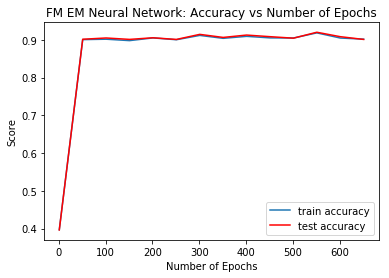

In [94]:
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier

#change the number of hidden epochs
num_epochs = range(1,701, 50)

train_acc = []
test_acc = []

# scores[0] = scores[0].reshape(-1, 1)
# scores[1] = scores[1].reshape(-1, 1)


for i in num_epochs:
    print(i)
    hidden_layer = tuple([15]*2)
    mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=i, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1)
    mlp.fit(scores[0],y_train_FM)
    prediction_test = mlp.predict(scores[1])
    prediction_train = mlp.predict(scores[0])
    train_acc.append((accuracy_score(y_train_FM, prediction_train)))
    test_acc.append((accuracy_score(y_test_FM, prediction_test)))

import matplotlib.pyplot as plt
plt.figure()
plt.title('FM EM Neural Network: Accuracy vs Number of Epochs')
#plt.ylim((0,1))
plt.plot(num_epochs, list(train_acc), '-', label='train accuracy')
plt.plot(num_epochs, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Score")

#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.savefig('precision_accuracy_neural_net_num_epochs_fashion')
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (22500,8) (7500,8) 

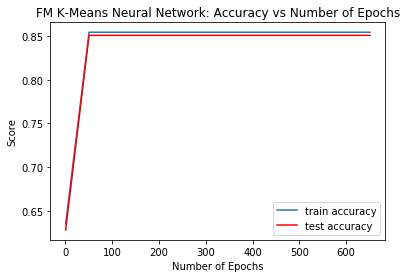

In [73]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('FM K-Means Neural Network: Accuracy vs Number of Epochs')
#plt.ylim((0,1))
plt.plot(num_epochs, list(train_acc), '-', label='train accuracy')
plt.plot(num_epochs, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Score")

#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.savefig('precision_accuracy_neural_net_num_epochs_fashion')
plt.legend()
plt.show()

In [53]:
train_loss_pca = []
test_loss_pca = []
from sklearn.decomposition import PCA as PCA

for i in range(1,11):
    compressor = PCA(n_components = i)
    compressor.fit(X_train_BC, y=y_train_BC)
    newtx = compressor.transform(X_train_BC)
    newrx = compressor.transform(X_test_BC)
    proj_train = compressor.inverse_transform(newtx)
    proj_test = compressor.inverse_transform(newrx)
    train_loss_pca.append(((X_train_BC-proj_train)**2).mean())
    test_loss_pca.append(((X_test_BC-proj_test)**2).mean())


In [57]:
from sklearn.random_projection import GaussianRandomProjection as RandomProjection
train_loss_rp = []
test_loss_rp = []
for i in range(1,11):
    compressor = RandomProjection(n_components = i)
    compressor.fit(X_train_BC, y=y_train_BC)
    newtx = compressor.transform(X_train_BC)
    newrx = compressor.transform(X_test_BC)
    inv_train = np.array(newtx).dot(compressor.components_) + np.array(X_train_BC.mean(axis=0))
    print(inv_train)
    print(X_train_BC)
    inv_test = np.array(newrx).dot(compressor.components_) + np.array(X_test_BC.mean(axis=0))
    train_loss_rp.append(((X_train_BC-inv_train)**2).mean())
    test_loss_rp.append(((X_test_BC-inv_test)**2).mean())

[[ 1.66472201 -1.14289871 -0.8312806  ... -0.78598329  0.68818838
   2.19248495]
 [ 4.8798483  -3.3748225  -2.4017686  ... -2.27338769  1.99786342
   6.3903796 ]
 [ 2.51533249 -1.73338804 -1.24677705 ... -1.17949871  1.0346828
   3.30310172]
 ...
 [-0.08877927  0.07437267  0.02524959 ...  0.02523383 -0.02609673
  -0.09700945]
 [-0.52122813  0.3745764   0.23648725 ...  0.22529637 -0.20225388
  -0.66164505]
 [ 2.35786192 -1.6240728  -1.16985763 ... -1.10664857  0.97053749
   3.09749709]]
[[-1.23554461 -0.53514364 -1.21383539 ... -0.93287611 -0.59494806
   0.04068534]
 [ 1.32995562  0.16064943  1.19167231 ...  0.22525888 -0.53994352
  -1.47272064]
 [-0.8512734  -0.62124513 -0.88554949 ... -1.12929922 -0.83761515
  -0.72682373]
 ...
 [ 0.13425586  0.93090865  0.08242022 ...  0.32423177 -0.68554377
  -0.8637008 ]
 [-0.27188444 -0.24891439 -0.31671283 ... -0.15388339 -1.07704668
  -0.81438072]
 [-0.65814375 -0.44206096 -0.68783653 ... -1.08940554  0.48411161
  -1.00778193]]
[[ 3.16558756 -2.

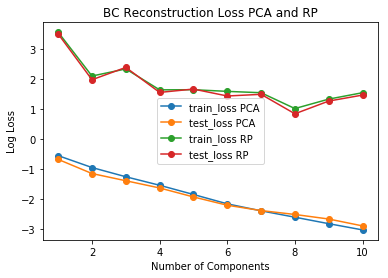

In [60]:
plt.figure()
plt.title('BC Reconstruction Loss PCA and RP')
#plt.ylim((0,1))


depths= range(1, 11)
#scores= [completeness, homo, fm, silo] 
plt.plot(depths, np.log(train_loss_pca), 'o-',  label='train_loss PCA')
plt.plot(depths, np.log(test_loss_pca),'o-',   label='test_loss PCA')
plt.plot(depths, np.log(train_loss_rp),'o-',   label='train_loss RP')

plt.plot(depths, np.log(test_loss_rp),'o-',   label='test_loss RP')


plt.xlabel("Number of Components")
plt.ylabel("Log Loss")
plt.legend()
plt.savefig('depth_scores_BC_km')
plt.show()

In [56]:
train_loss

[0.5751380570559913,
 0.3864074425472777,
 0.28371870080478023,
 0.21335789739247563,
 0.1567721129386304,
 0.1146157067819653,
 0.09068410876978651,
 0.07325915426677565,
 0.058997149506668296,
 0.047878186656384325]

[8489405.94436687, 6737524.733967862, 5904026.321159062, 5083284.453400218, 4429756.322295628, 3934584.5211018273, 3480665.6293742512, 3273217.0762197366, 3089994.748243495, 2912917.956140345, 2757528.6473227716, 2623068.853281274, 2509895.869916995, 2407622.825960108, 2306115.668844853, 2227832.75679392, 2157704.66029266, 2099476.5273667304]
[0.755780307432434, 0.5600685289906163, 0.5623848500461568, 0.6269343818410049, 0.6107113276397536, 0.6090656712189608, 0.5718990010697405, 0.5565481843244736, 0.5503013597470665, 0.5411121881058085, 0.5226420105085743, 0.5018421406792871, 0.4890085711369377, 0.4841944861623523, 0.4810670987434526, 0.4735274455339826, 0.46463251435808905, 0.4565508996500701]
[0.30530847653054666, 0.38184253940339224, 0.4787688998510305, 0.6169150183040415, 0.6745615968757891, 0.7211514854519122, 0.7202264833914012, 0.7431519722917941, 0.7542572617906447, 0.7646832199475531, 0.7620823489480936, 0.7640788055382265, 0.7801494557895153, 0.7835434537374476, 0.801773973

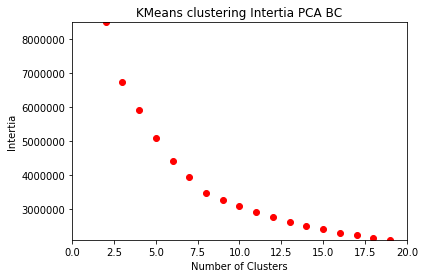

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

In [187]:
scores = pca(X_train_FM, y_train_FM, X_test_FM, y_test_FM,10)

In [175]:
scores

[[0.755512700756591,
  0.5603663526093737,
  0.5617069249224577,
  0.6266882330586713,
  0.6115250106553929,
  0.609065671218961,
  0.5718990010697405,
  0.5563125492207008,
  0.5500989756640396,
  0.5165756013578461,
  0.5227215063276729,
  0.5018641686241814,
  0.4888651887509992,
  0.48419828134128196,
  0.48114855589716377,
  0.4731147551248579,
  0.46446010729099196,
  0.4567684238440412],
 [0.3051627321068614,
  0.38202703088435613,
  0.4781212606756907,
  0.6166349794077903,
  0.6754656359522994,
  0.7211514854519123,
  0.7202264833914012,
  0.7428327666836028,
  0.7545357008196204,
  0.7389684235902889,
  0.7622069091767506,
  0.7640023171474231,
  0.7797129505239835,
  0.7958741896226403,
  0.8017658267672478,
  0.807722213605362,
  0.8087828481591035,
  0.8096393852428216],
 [0.5496099203973911,
  0.5473328141131779,
  0.5723743299419727,
  0.6437195092241375,
  0.6723467355811306,
  0.6830622983327415,
  0.6278391297235038,
  0.6102495080631108,
  0.605741617653729,
  0.5673

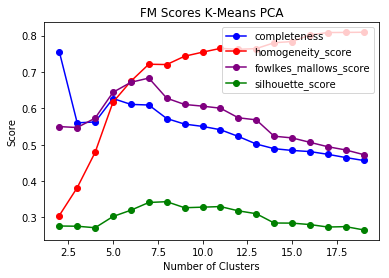

In [188]:
plt.figure()
plt.title('FM Scores K-Means PCA')
#plt.ylim((0,1))


depths= range(2, len(scores[0])+2)
#scores= [completeness, homo, fm, silo] 
plt.plot(depths, scores[0], 'o-', color='blue', label='completeness')
plt.plot(depths, scores[1],'o-',  color='red', label='homogeneity_score')
plt.plot(depths, scores[2],'o-',  color='purple', label='fowlkes_mallows_score')
plt.plot(depths, scores[3],'o-',  color='green', label='silhouette_score')



plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.savefig('depth_scores_FM_km')
plt.show()

In [107]:
var = pca(X_train_FM, y_train_FM, X_test_FM, y_test_FM)

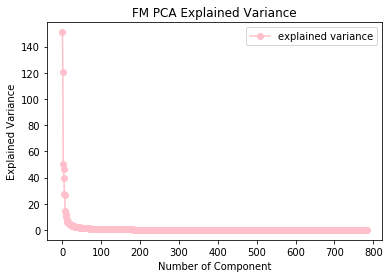

In [139]:
plt.figure()
plt.title('FM PCA Explained Variance')
#plt.ylim((0,1))


depths= range(1, len(X_train_FM[0]))
#scores= [completeness, homo, fm, silo] 
plt.plot(depths, var, 'o-', color='pink', label='explained variance')




plt.xlabel("Number of Component")
plt.ylabel("Explained Variance")
plt.legend()
plt.savefig('_scores_FM_var')
plt.show()

In [110]:
print(var)

[1.50981047e+02 1.20508312e+02 5.07104435e+01 4.61959078e+01
 3.95299333e+01 2.73130142e+01 2.69041790e+01 1.43698381e+01
 1.18696342e+01 1.08056695e+01 9.50750920e+00 7.49380043e+00
 7.31589210e+00 6.37382864e+00 5.92922492e+00 5.61262421e+00
 5.23254923e+00 5.04107195e+00 4.78606225e+00 4.67617015e+00
 4.20910318e+00 4.09471266e+00 3.77712648e+00 3.65256324e+00
 3.59202076e+00 3.33011515e+00 3.14722781e+00 3.12924573e+00
 2.96368822e+00 2.84837919e+00 2.78111230e+00 2.70554257e+00
 2.49909276e+00 2.48151191e+00 2.41178159e+00 2.37815533e+00
 2.30291518e+00 2.20304499e+00 2.18688505e+00 2.10000402e+00
 2.08157794e+00 2.04135426e+00 1.90882127e+00 1.89458804e+00
 1.86346877e+00 1.77011980e+00 1.75432386e+00 1.69783742e+00
 1.68807968e+00 1.65032555e+00 1.62066332e+00 1.59135375e+00
 1.57106498e+00 1.50775349e+00 1.48089950e+00 1.43406449e+00
 1.39511667e+00 1.35890622e+00 1.34312151e+00 1.33524712e+00
 1.31728590e+00 1.28417910e+00 1.27773259e+00 1.25931600e+00
 1.23892777e+00 1.204046

In [194]:
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier

#change the number of hidden epochs
num_epochs = range(1,701, 25)

train_acc = []
test_acc = []

compressor = PCA(n_components = 10)
compressor.fit(X_train_FM, y=y_train_FM)
compressor.explained_variance_
newtx = compressor.transform(X_train_FM)
newrx = compressor.transform(X_test_FM)

for i in num_epochs:
    print(i)
    hidden_layer = tuple([15]*14)
    mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=i, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1)
    mlp.fit(newtx,y_train_FM)
    prediction_test = mlp.predict(newrx)
    prediction_train = mlp.predict(newtx)
    train_acc.append((accuracy_score(y_train_FM, prediction_train)))
    test_acc.append((accuracy_score(y_test_FM, prediction_test)))

import matplotlib.pyplot as plt
plt.figure()
plt.title('FM PCA Neural Network: Accuracy vs Number of Epochs')
#plt.ylim((0,1))
plt.plot(num_epochs, list(train_acc), '-', label='train accuracy')
plt.plot(num_epochs, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Score")

#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.savefig('precision_accuracy_neural_net_num_epochs_fashion')
plt.legend()
plt.show()

for i in num_layers:
    print(i)
    hidden_layer = tuple([15]*i)
    est = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=100, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1, warm_start=True)
    est.fit(X_train_FM, y_train_FM)
    train_acc.append((accuracy_score(y_train_FM, est.predict(X_train_FM))))
    test_acc.append((accuracy_score(y_test_FM, est.predict(X_test_FM))))

plt.figure()
plt.title('FM PCA Neural Network: Accuracy vs Number of Layers')
#plt.ylim((0,1))
plt.plot(num_layers, list(train_acc), '-', label='train accuracy')
plt.plot(num_layers, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Layers")
plt.ylabel("Score")

#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.legend()
plt.savefig('precision_accuracy_neural_net_num_epochs_fashion')

plt.show()

1


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


26


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (26) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


51


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


76


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (76) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


101


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


126


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (126) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


151


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (151) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


176
201
226
251
276
301
326
351
376
401
426
451
476
501
526
551
576
601
626
651
676


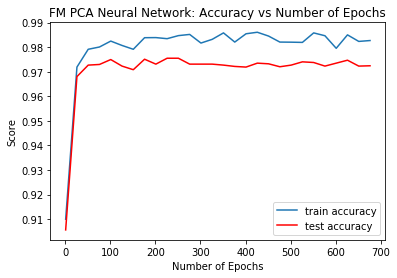

In [196]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('FM PCA Neural Network: Accuracy vs Number of Epochs')
#plt.ylim((0,1))
plt.plot(num_epochs, list(train_acc), '-', label='train accuracy')
plt.plot(num_epochs, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Score")

#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.savefig('precision_accuracy_neural_net_num_epochs_fashion')
plt.legend()
plt.show()

In [6]:
num_layers = range(0,20)
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA as PCA

train_acc = []
test_acc = []

compressor = PCA(n_components = 10)
compressor.fit(X_train_FM, y=y_train_FM)
compressor.explained_variance_
newtx = compressor.transform(X_train_FM)
newrx = compressor.transform(X_test_FM)

for i in num_layers:
    print(i)
    hidden_layer = tuple([15]*i)
    est = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=100, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1, warm_start=True)
    est.fit(X_train_FM, y_train_FM)
    train_acc.append((accuracy_score(y_train_FM, est.predict(X_train_FM))))
    test_acc.append((accuracy_score(y_test_FM, est.predict(X_test_FM))))

0


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1
2
3
4
5
6
7
8
9
10
11


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


12
13
14
15
16
17


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


18
19


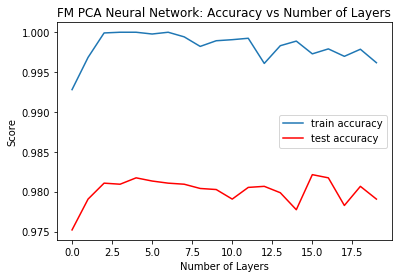

In [10]:
plt.figure()
plt.title('FM PCA Neural Network: Accuracy vs Number of Layers')
#plt.ylim((0,1))
plt.plot(num_layers, list(train_acc), '-', label='train accuracy')
plt.plot(num_layers, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Layers")
plt.ylabel("Score")

#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.legend()
plt.savefig('precision_accuracy_neural_net_num_epochs_fashion')

plt.show()

In [97]:
from sklearn.decomposition import FastICA as ICA
def ica(tx, ty, rx, ry):
    scores = []
    compressor = ICA(n_components=7, whiten=False)  # for some people, whiten needs to be off
    compressor.fit(tx, y=ty)
    newtx = compressor.transform(tx)
    newrx = compressor.transform(rx)
    scores.append(onekm(newtx, ty, newrx, ry, times=7))
    scores.append(oneem(newtx, ty, newrx, ry, times=7))
    return scores
   

In [109]:
scores = kbest(X_train_FM, y_train_FM, X_test_FM, y_test_FM)

1
51


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


101
151
201
251


Text(0, 0.5, 'Score')

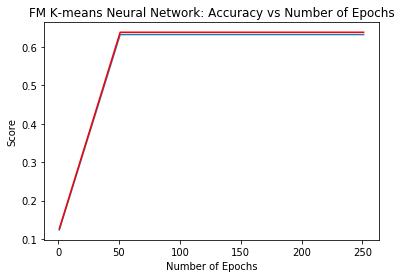

In [113]:
newtx = scores[1][0].reshape(-1,1)
newrx = scores[1][1].reshape(-1,1)
num_epochs = range(1,301, 50)
train_acc = []
test_acc = []
for i in num_epochs:
    print(i)
    hidden_layer = tuple([15]*3)
    mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=i, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1)
    mlp.fit(newtx,y_train_FM)
    prediction_test = mlp.predict(newrx)
    prediction_train = mlp.predict(newtx)
    train_acc.append((accuracy_score(y_train_FM, prediction_train)))
    test_acc.append((accuracy_score(y_test_FM, prediction_test)))

import matplotlib.pyplot as plt
plt.figure()
plt.title('FM K-means Neural Network: Accuracy vs Number of Epochs')
#plt.ylim((0,1))
plt.plot(num_epochs, list(train_acc), '-', label='train accuracy')
plt.plot(num_epochs, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Score")

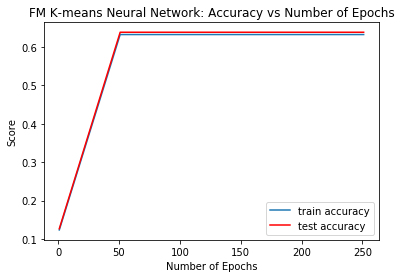

In [114]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('FM K-means Neural Network: Accuracy vs Number of Epochs')
#plt.ylim((0,1))
plt.plot(num_epochs, list(train_acc), '-', label='train accuracy')
plt.plot(num_epochs, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Score")
plt.legend()
plt.savefig('precision_accuracy_neural_net_num_epochs_fashion')

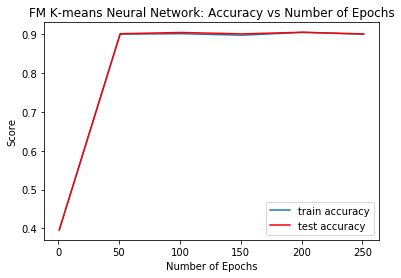

In [105]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('FM K-means Neural Network: Accuracy vs Number of Epochs')
#plt.ylim((0,1))
plt.plot(num_epochs, list(train_acc[:-34]), '-', label='train accuracy')
plt.plot(num_epochs, list(test_acc[:-34]),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Score")
plt.legend()
plt.savefig('precision_accuracy_neural_net_num_epochs_fashion')


In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('FM K-means Neural Network: Accuracy vs Number of Epochs')
#plt.ylim((0,1))
plt.plot(num_epochs, list(train_acc[:-14]), '-', label='train accuracy')
plt.plot(num_epochs, list(test_acc[:-14]),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Score")

1
51


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


101
151
201
251


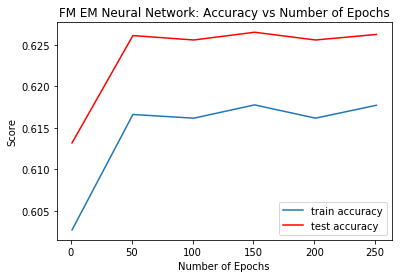

In [116]:
newtx = scores[0][0]
newrx = scores[0][1]
train_acc =[]
test_acc = []
for i in num_epochs:
    print(i)
    hidden_layer = tuple([15]*3)
    mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=i, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1)
    mlp.fit(newtx,y_train_FM)
    prediction_test = mlp.predict(newrx)
    prediction_train = mlp.predict(newtx)
    train_acc.append((accuracy_score(y_train_FM, prediction_train)))
    test_acc.append((accuracy_score(y_test_FM, prediction_test)))

import matplotlib.pyplot as plt
plt.figure()
plt.title('FM EM Neural Network: Accuracy vs Number of Epochs')
#plt.ylim((0,1))
plt.plot(num_epochs, list(train_acc), '-', label='train accuracy')
plt.plot(num_epochs, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Score")
plt.legend()
plt.savefig('precision_accuracy_neural_net_num_epochs_fashion')

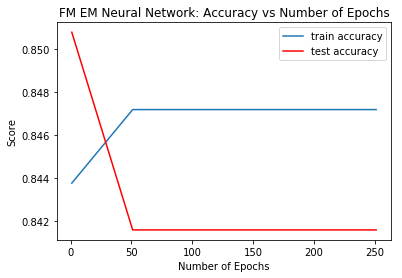

In [107]:
plt.figure()
plt.title('FM EM Neural Network: Accuracy vs Number of Epochs')
#plt.ylim((0,1))
plt.plot(num_epochs, list(train_acc), '-', label='train accuracy')
plt.plot(num_epochs, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Score")
plt.legend()
plt.savefig('precision_accuracy_neural_net_num_epochs_fashion')

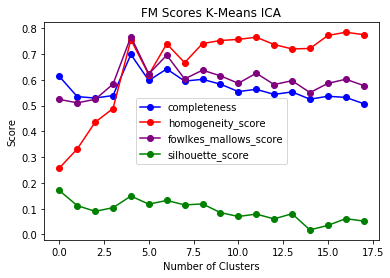

In [30]:
plt.figure()
plt.title('K-means')
#plt.ylim((0,1))


depths= range(0, len(scores[0][0]))
#scores= [completeness, homo, fm, silo] 
plt.plot(depths, scores[0][0], 'o-', label='training')
plt.plot(depths, scores[0][1],'o-',  color='red', label='testing')


plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.savefig('depth_scores_FM_km')
plt.show()

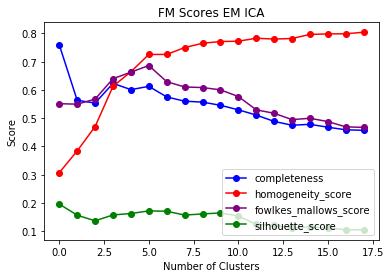

In [29]:
plt.figure()
plt.title('FM Scores K-Means ICA')
#plt.ylim((0,1))


depths= range(0, len(scores[0][0]))
#scores= [completeness, homo, fm, silo] 
plt.plot(depths, scores[0][0], 'o-', color='blue', label='completeness')
plt.plot(depths, scores[0][1],'o-',  color='red', label='homogeneity_score')
plt.plot(depths, scores[0][2],'o-',  color='purple', label='fowlkes_mallows_score')
plt.plot(depths, scores[0][3],'o-',  color='green', label='silhouette_score')



plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.savefig('depth_scores_FM_km')
plt.show()


plt.figure()
plt.title('FM Scores EM ICA')
#plt.ylim((0,1))


depths= range(0, len(scores[1][0]))
#scores= [completeness, homo, fm, silo] 
plt.plot(depths, scores[1][0], 'o-', color='blue', label='completeness')
plt.plot(depths, scores[1][1],'o-',  color='red', label='homogeneity_score')
plt.plot(depths, scores[1][2],'o-',  color='purple', label='fowlkes_mallows_score')
plt.plot(depths, scores[1][3],'o-',  color='green', label='silhouette_score')



plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.savefig('depth_scores_FM_km')
plt.show()

In [ ]:
from sklearn.random_projection import GaussianRandomProjection as RandomProjection
def randproj(tx, ty, rx, ry):
    compressor = RandomProjection(tx[1].size)
    compressor.fit(tx, y=ty)
    newtx = compressor.transform(tx)
    # compressor = RandomProjection(tx[1].size)
    newrx = compressor.transform(rx)
    em(newtx, ty, newrx, ry, add="wRPtr", times=10)
    km(newtx, ty, newrx, ry, add="wRPtr", times=10)


In [32]:
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier
import statistics

#change the number of hidden epochs
num_epochs = range(1,301, 50)

train_acc = []
test_acc = []

compressor = ICA(n_components=10, whiten=False)  # for some people, whiten needs to be off
compressor.fit(X_train_FM, y=y_train_FM)
newtx = compressor.transform(X_train_FM)
newrx = compressor.transform(X_test_FM)

for i in num_epochs:
    print(i)
    hidden_layer = tuple([15]*14)
    mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=i, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1)
    mlp.fit(newtx,y_train_FM)
    prediction_test = mlp.predict(newrx)
    prediction_train = mlp.predict(newtx)
    train_acc.append((accuracy_score(y_train_FM, prediction_train)))
    test_acc.append((accuracy_score(y_test_FM, prediction_test)))

/usr/local/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:299: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn('Ignoring n_components with whiten=False.')
/usr/local/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


1


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


51


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


101
151
201
251


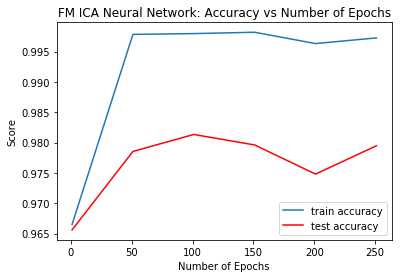

In [33]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('FM ICA Neural Network: Accuracy vs Number of Epochs')
#plt.ylim((0,1))
plt.plot(num_epochs, list(train_acc), '-', label='train accuracy')
plt.plot(num_epochs, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Score")

#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.legend()
plt.savefig('precision_accuracy_neural_net_num_epochs_fashion')

plt.show()

In [34]:
num_layers = range(0,20)
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA as PCA

train_acc = []
test_acc = []

compressor = ICA(n_components=10, whiten=False)  # for some people, whiten needs to be off
compressor.fit(X_train_FM, y=y_train_FM)
newtx = compressor.transform(X_train_FM)
newrx = compressor.transform(X_test_FM)


for i in num_layers:
    print(i)
    hidden_layer = tuple([15]*i)
    est = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=100, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1, warm_start=True)
    est.fit(X_train_FM, y_train_FM)
    train_acc.append((accuracy_score(y_train_FM, est.predict(X_train_FM))))
    test_acc.append((accuracy_score(y_test_FM, est.predict(X_test_FM))))

/usr/local/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:299: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn('Ignoring n_components with whiten=False.')
/usr/local/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


0


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


16
17
18
19


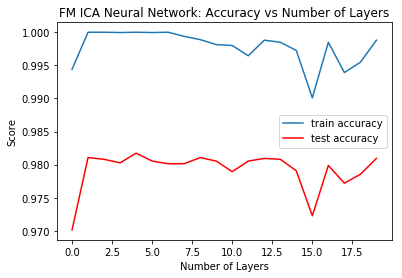

In [35]:
plt.figure()
plt.title('FM ICA Neural Network: Accuracy vs Number of Layers')
#plt.ylim((0,1))
plt.plot(num_layers, list(train_acc), '-', label='train accuracy')
plt.plot(num_layers, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Layers")
plt.ylabel("Score")

#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.legend()
plt.savefig('precision_accuracy_neural_net_num_layers_fashion')

plt.show()

In [ ]:
num_layers = range(0,10)
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA as PCA

train_acc = []
test_acc = []

compressor = ICA(n_components=10, whiten=False)  # for some people, whiten needs to be off
compressor.fit(X_train_FM, y=y_train_FM)
newtx = compressor.transform(X_train_FM)
newrx = compressor.transform(X_test_FM)


for i in num_layers:
    print(i)
    hidden_layer = tuple([15]*i)
    est = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=100, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1, warm_start=True)
    est.fit(X_train_FM, y_train_FM)
    train_acc.append((accuracy_score(y_train_FM, est.predict(X_train_FM))))
    test_acc.append((accuracy_score(y_test_FM, est.predict(X_test_FM))))